# **Step 3: Exploratory Data Analysis (EDA) & Hypothesis Setup**

In this notebook, we will:

1. **Explore feature distributions** to understand the data structure.
2. **Visualize correlations and relationships** with the target variable `SalePrice`.
3. **Detect missing values and outliers** that could affect modeling.
4. **Identify top predictive features** for our regression model.
5. **Formulate and justify initial project hypotheses** for validation later.

---

**Key Objectives:**
- Understand which variables are likely to influence house prices.
- Provide insights that can support feature engineering and model training.
- Build a distinction-level project by documenting reasoning and findings clearly.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv'
df = pd.read_csv(data_path)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


### **Task: Initial Data Overview**

We will:
1. View basic information on the dataset (columns, dtypes, null counts).
2. Identify numerical and categorical features.
3. Get an initial sense of missing values.

In [2]:
# General Info
df.info()

# Missing Value Summary
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0].head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

EnclosedPorch    1324
WoodDeckSF       1305
LotFrontage       259
GarageFinish      235
BsmtFinType1      145
BedroomAbvGr       99
2ndFlrSF           86
GarageYrBlt        81
BsmtExposure       38
MasVnrArea          8
dtype: int64

### **Task: Summary Statistics**

We compute descriptive statistics to understand the distribution of numeric features.
This helps detect:
- Extreme values (potential outliers)
- Data ranges and scales
- Mean vs median differences (skewness)

In [3]:
df.describe().T.head(15)  # Show top 15 rows for readability

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0
2ndFlrSF,1374.0,348.524017,438.865586,0.0,0.0,0.0,728.00,2065.0
BedroomAbvGr,1361.0,2.869214,0.820115,0.0,2.0,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.0,477.5,808.00,2336.0
EnclosedPorch,136.0,25.330882,66.684115,0.0,0.0,0.0,0.00,286.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.00,1418.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0


### **Task: Visualize the Target Variable**

We analyze the `SalePrice` distribution to check:
- Skewness
- Outliers
- If log transformation may be needed for modeling

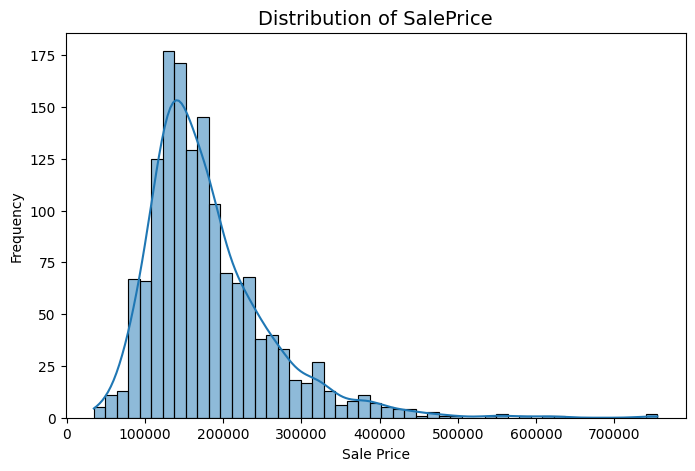

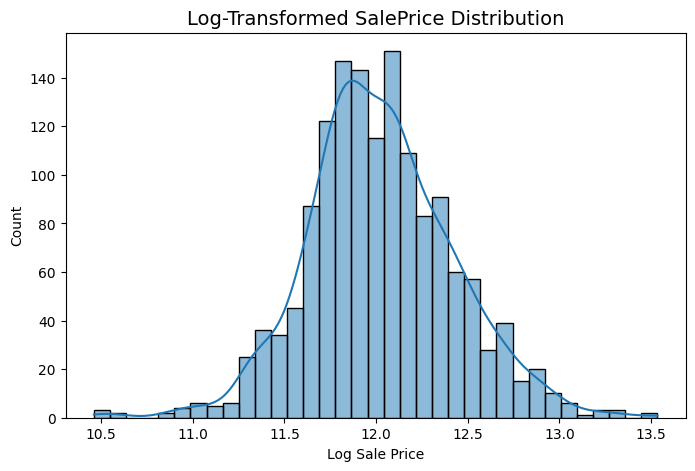

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice', fontsize=14)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Optional: Log-transformed distribution
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['SalePrice']), kde=True)
plt.title('Log-Transformed SalePrice Distribution', fontsize=14)
plt.xlabel('Log Sale Price')
plt.show()


### **Task: Correlation with SalePrice**

We focus on **numeric features** to find linear relationships with `SalePrice`.
- Compute Pearson correlation
- Identify **top 10 features** positively correlated with `SalePrice`
- Visualize correlations with a heatmap

Top Correlated Features:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


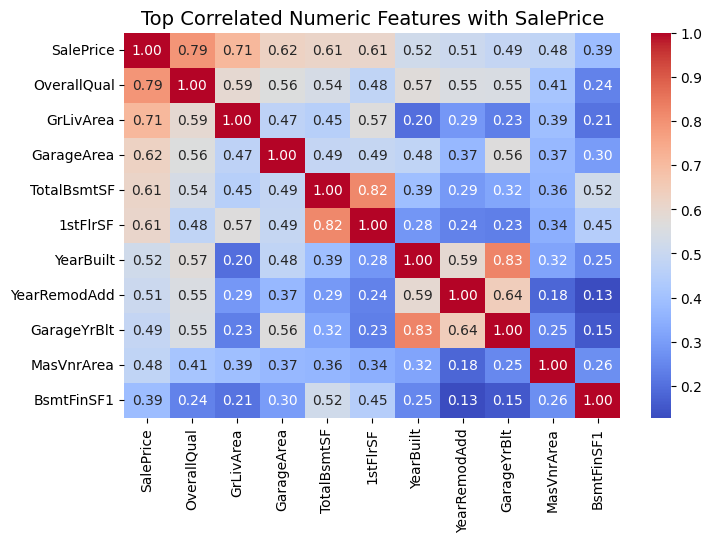

In [5]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute correlations
corr_matrix = df[numeric_cols].corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(11)  # Include SalePrice itself

print("Top Correlated Features:\n", top_corr)

# Heatmap for top correlations
plt.figure(figsize=(8,5))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Numeric Features with SalePrice', fontsize=14)
plt.show()

### **Task: Scatter Plots of Top Features vs SalePrice**

We visually inspect the relationship between top correlated features and `SalePrice`:
- Detect trends (linear/non-linear)
- Spot outliers that may affect modeling

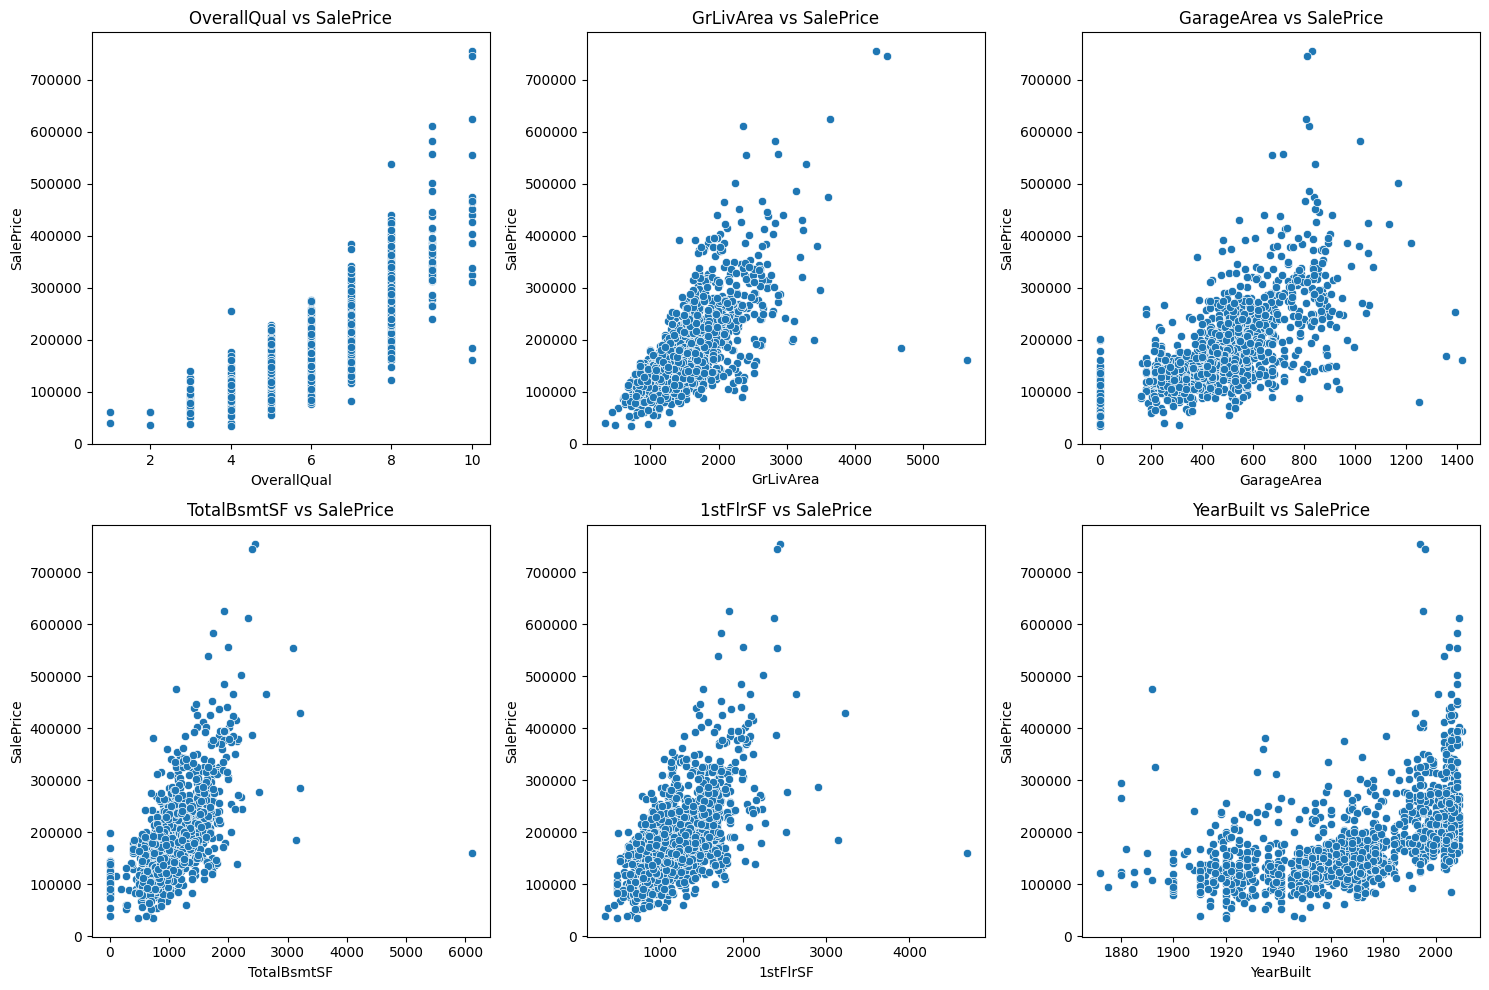

In [8]:
# Scatter Plots for Top Features vs SalePrice
top_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']

plt.figure(figsize=(15,10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2,3,i)
    
    # Drop rows with NaN in this feature or SalePrice
    plot_df = df[[feature, 'SalePrice']].dropna()
    
    sns.scatterplot(x=plot_df[feature], y=plot_df['SalePrice'])
    plt.title(f'{feature} vs SalePrice')

plt.tight_layout()
plt.show()

### **Task: Boxplots for Categorical Features**

We analyze the impact of selected categorical variables on `SalePrice`:
- `Neighborhood`
- `HouseStyle`
- `OverallQual` (treated as ordered categorical)

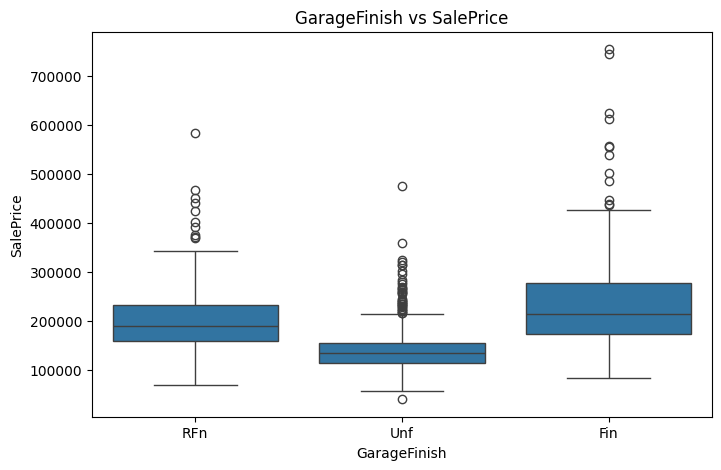

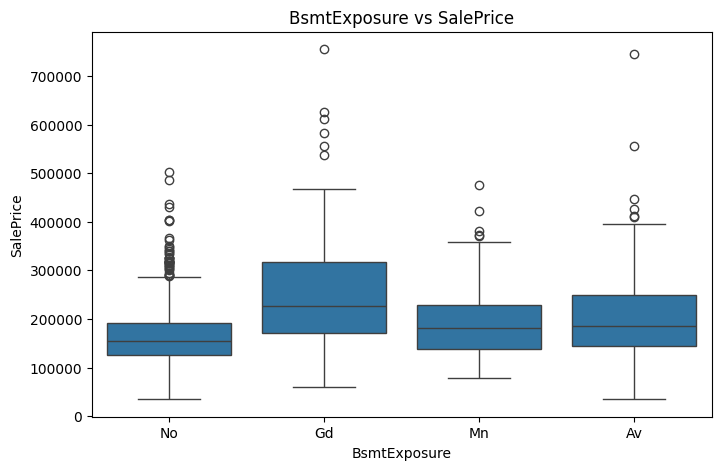

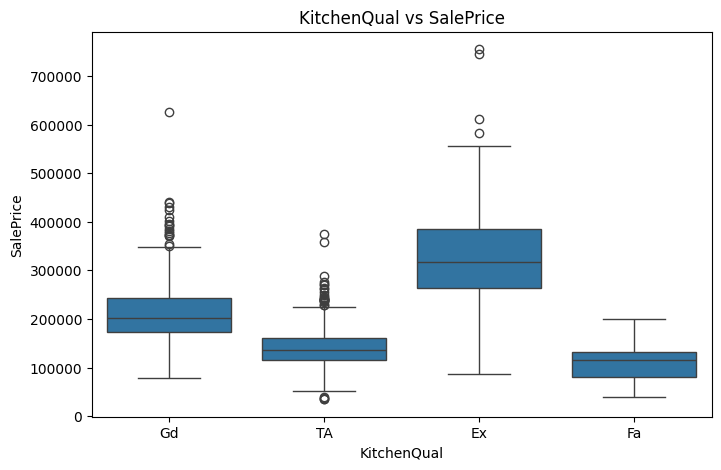

In [10]:
categorical_features = ['GarageFinish', 'BsmtExposure', 'KitchenQual']

for feature in categorical_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=feature, y='SalePrice', data=df)
    plt.title(f'{feature} vs SalePrice')
    plt.show()


# **Initial Hypotheses**

From the EDA, we propose the following hypotheses:

1. **H1:** Houses with higher `OverallQual` have significantly higher `SalePrice`.
2. **H2:** Houses with larger `GrLivArea` and `TotalBsmtSF` achieve higher `SalePrice`.
3. **H3:** Houses with better quality categories (`KitchenQual` or `GarageFinish`) have higher `SalePrice`.

**Next Steps:**  
- Validate these hypotheses with correlation and visual inspection.
- Prepare for feature engineering and model building in the next notebook.
